In [62]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [63]:
#  Import and read the charity_data.csv.
import pandas as pd
mental_df = pd.read_csv("Student Mental health.csv")
mental_df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [64]:
# Rename the columns
mental_df.columns = ['Timestamp','Gender','Age','Course','Year_of_Study','CGPA','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

In [65]:
# Display data with new header names
mental_df.head(2)

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No


In [66]:
# Convert categorical data to numeric with `pd.get_dummies`
A_df = pd.get_dummies(mental_df)
A_df.head(2)

,Age,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,Timestamp_13/07/2020 10:12:26,Timestamp_13/07/2020 10:12:28,Timestamp_13/07/2020 10:14:46,Timestamp_13/07/2020 10:33:47,Timestamp_13/07/2020 10:34:08,...,Marital_Status_No,Marital_Status_Yes,Depression_No,Depression_Yes,Anxiety_No,Anxiety_Yes,Panic_Atack_No,Panic_Atack_Yes,Treatment_No,Treatment_Yes
0,18.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
1,21.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0


In [67]:
# Determine the number of ubique variables
mental_df.nunique()

Timestamp         92
Gender             2
Age                7
Course            49
Year_of_Study      7
CGPA               6
Marital_Status     2
Depression         2
Anxiety            2
Panic_Atack        2
Treatment          2
dtype: int64

Data Processing

In [68]:
mental_df['Age'].fillna(mental_df['Age'].median(),inplace=True)

In [69]:
mental_df['Year_of_Study'] = mental_df['Year_of_Study'].astype(str).str.extract('(\d+)').astype(int)

In [70]:
mental_df['Timestamp'] = pd.to_datetime(mental_df['Timestamp'])

In [71]:
def calculate_cgpa(x):
    if isinstance(x,str):
        first,second=x.split('-')
        return (float(first.strip())+float(second.strip()))/2
    else:
        return x
mental_df['CGPA']=mental_df['CGPA'].apply(calculate_cgpa)

In [72]:
le=LabelEncoder()
cat_cols=['Gender','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

for col in cat_cols:
    mental_df[col]=le.fit_transform(mental_df[col])
mental_df

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,2020-08-07 12:02:00,0,18.0,Engineering,1,3.245,0,1,0,1,0
1,2020-08-07 12:04:00,1,21.0,Islamic education,2,3.245,0,0,1,0,0
2,2020-08-07 12:05:00,1,19.0,BIT,1,3.245,0,1,1,1,0
3,2020-08-07 12:06:00,0,22.0,Laws,3,3.245,1,1,0,0,0
4,2020-08-07 12:13:00,1,23.0,Mathemathics,4,3.245,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,0,21.0,BCS,1,3.750,0,0,1,0,0
97,2020-07-13 21:21:42,1,18.0,Engineering,2,3.245,0,1,1,0,0
98,2020-07-13 21:22:56,0,19.0,Nursing,3,3.750,1,1,0,1,0
99,2020-07-13 21:23:57,0,23.0,Pendidikan Islam,4,3.750,0,0,0,0,0


In [73]:
# Drop Timestamp and Course- this will have no impact on the model
mental_clean_df = mental_df.drop(columns={"Timestamp", "Course"})
mental_clean_df.head(2)

,Gender,Age,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,0,18.0,1,3.245,0,1,0,1,0
1,1,21.0,2,3.245,0,0,1,0,0


In [74]:
# Split our preprocessed data into our features and target arrays
x = mental_clean_df.drop(columns=['Depression']).values
y = mental_clean_df['Depression'].values


In [75]:
len(x[0])

8

In [76]:
x[0]

array([ 0.   , 18.   ,  1.   ,  3.245,  0.   ,  0.   ,  1.   ,  0.   ])

In [77]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [78]:
# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y)



In [79]:
len(x_train[0])

8

In [80]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
print(x_train_scaled[0])

[-0.52075564 -0.58142801 -0.91140749 -0.25019276 -0.45790547  1.33333333
  1.22474487 -0.26726124]


In [81]:
# Create a keras sequentila model
nn_model = tf.keras.models.Sequential()


In [82]:
# Add first dense layer including the input layer (hidden layer)
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim =8))
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))


In [83]:
# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [84]:
# Check the structure of the model
nn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [86]:
# Train the model
fit_model = nn_model.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 0.6837 - accuracy: 0.6133
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.6267
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.6400
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.6533
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.6800
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6672 - accuracy: 0.6933
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.6642 - accuracy: 0.6933
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6614 - accuracy: 0.6933
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.6800
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.6800
Epoch 11/100
3/3 [==========

In [87]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.4548 - accuracy: 0.7692 - 256ms/epoch - 256ms/step
Loss: 0.45478102564811707, Accuracy: 0.7692307829856873


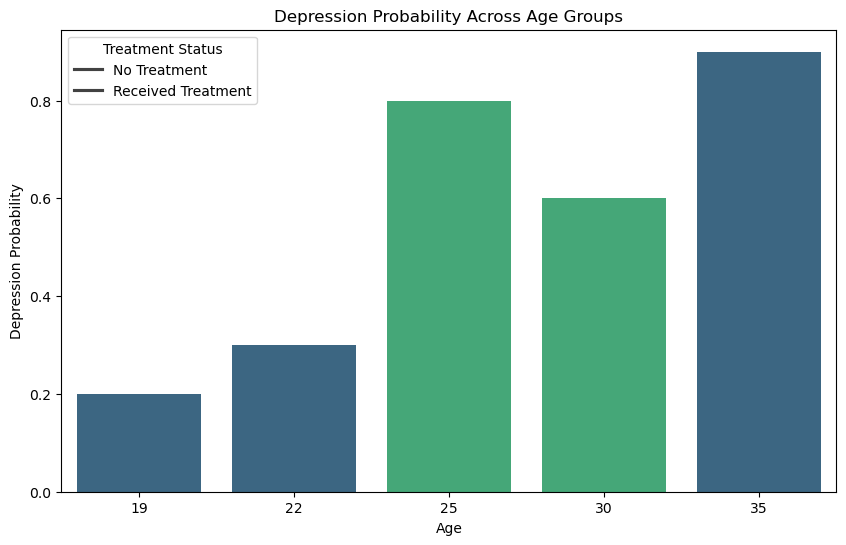

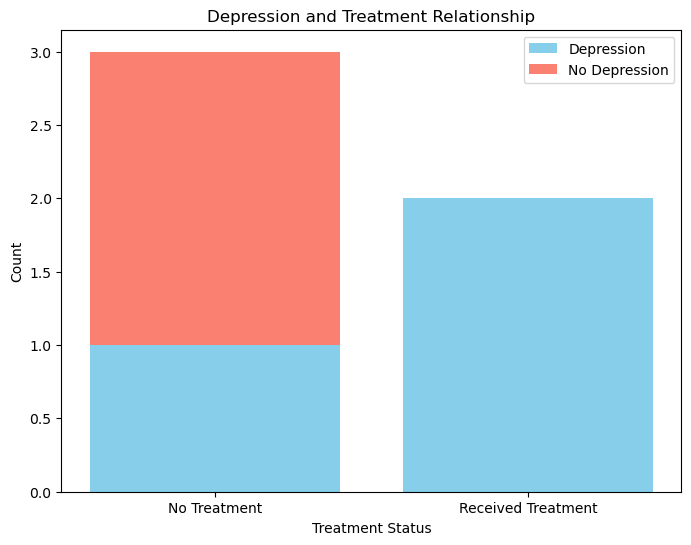

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

predicted_probabilities = [0.3, 0.8, 0.2, 0.6, 0.9]
treatment_status = [0, 1, 0, 1, 0]  # 0: No Treatment, 1: Received Treatment

ages = [22, 25, 19, 30, 35]

# Create a bar chart for the prevalence of depression across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=ages, y=predicted_probabilities, hue=treatment_status, palette="viridis")
plt.title('Depression Probability Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Depression Probability')
plt.legend(title='Treatment Status', loc='upper left', labels=['No Treatment', 'Received Treatment'])
plt.show()

# Create a stacked bar chart for the relationship between depression and treatment
treatment_counts = [sum(1 for status in treatment_status if status == 0),
                    sum(1 for status in treatment_status if status == 1)]

no_treatment_counts = [sum(1 for (status, prob) in zip(treatment_status, predicted_probabilities) if status == 0 and prob >= 0.5),
                       sum(1 for (status, prob) in zip(treatment_status, predicted_probabilities) if status == 0 and prob < 0.5)]

received_treatment_counts = [sum(1 for (status, prob) in zip(treatment_status, predicted_probabilities) if status == 1 and prob >= 0.5),
                              sum(1 for (status, prob) in zip(treatment_status, predicted_probabilities) if status == 1 and prob < 0.5)]

labels = ['No Treatment', 'Received Treatment']
plt.figure(figsize=(8, 6))
plt.bar(labels, no_treatment_counts, color='skyblue', label='Depression')
plt.bar(labels, received_treatment_counts, bottom=no_treatment_counts, color='salmon', label='No Depression')
plt.title('Depression and Treatment Relationship')
plt.xlabel('Treatment Status')
plt.ylabel('Count')
plt.legend()
plt.show()


Text(0.5, 1.0, 'CGPA Distribution')

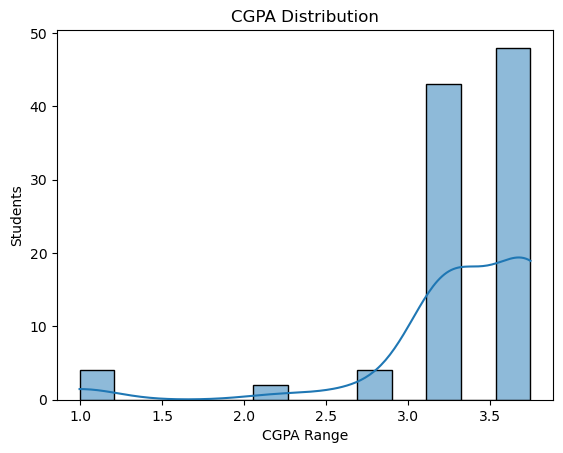

In [91]:
sns.histplot(mental_df["CGPA"].sort_values(), kde = True)
plt.xlabel("CGPA Range")
plt.ylabel("Students")
plt.title("CGPA Distribution")

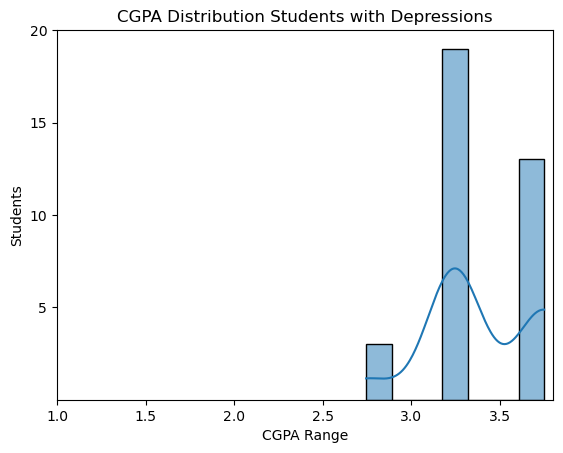

In [95]:
depressed_students_df = mental_df[mental_df['Depression'] == 1]

sns.histplot(depressed_students_df["CGPA"].sort_values(), kde=True)
plt.xlabel("CGPA Range")
plt.ylabel("Students")
plt.title("CGPA Distribution Students with Depressions")
plt.xticks([1.0,1.5,2.0,2.5,3.0,3.5])
plt.yticks([5, 10, 15, 20])
plt.show()
